In [18]:
import pandas as pd
import numpy as np
# we are importing a linear model form sklearn library
from sklearn import linear_model
# For creating/splitting training and testing data
from sklearn.model_selection import train_test_split

In [19]:
auto = pd.read_csv('auto_mpg.csv')
print(auto.head())
auto_disp = auto['displacement'].astype(float) # converting columns into float
auto_mpg = auto['mpg'].astype(float)   # same as above
mean_disp = np.mean(auto_disp) #Calcuate mean of displacement
min_disp = np.min(auto_disp)  #Calcualte Min if displacement
max_disp = np.max(auto_disp) # Calcualte displacement max
print(mean_disp, max_disp, min_disp, max_disp-min_disp)
auto_disp = auto_disp.apply(lambda x: x/100)  # we are doing this to keep the values as small as possible  # if it is positive realtionship, it will still be positive.  same for negative
print("-----Displacement Stats-----" ) # lambda simplifies the def x(): function  lambda x (inputs)  : y (outputs) 
print(auto_disp.describe())
auto_mpg = auto_mpg.apply(lambda x: x/100)
print("-----Mileage Stats-----" )
print(auto_mpg.describe())

    mpg  cylinder  displacement horse power  weight  acceleration  model year  \
0  18.0         8         307.0         130    3504          12.0          70   
1  15.0         8         350.0         165    3693          11.5          70   
2  18.0         8         318.0         150    3436          11.0          70   
3  16.0         8         304.0         150    3433          12.0          70   
4  17.0         8         302.0         140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
193.42587939698493 455.0 68.0 387.0
-----Displacement Stats-----
count    398.000000
mean       1.934259
std        1.042698
min        0.680000
25%        1.042500
50%        1.485000
75%        2.620000
max        4.550000
Name: displacement, dtype: float64
-----Mileage Stats-

In [20]:
print(type(auto_disp))

<class 'pandas.core.series.Series'>


What is correlation? 

Correlation describes the relationship between two variables. 

Correlation coefficient is a value that describes the strength of the 
relationship betweent two variables. 

Correlation graph (only 3 POSSIBLE CASES)

<img src="correlation_graph.png", width=400, height=300>

Correlation coefficient formula

<img src="correlation_formula.png", width=400, height=300>

Values of $r$ range from -1 to 1, -1 represents inverse or negative correlation, 1 represents direct or positive correlation. 0.4 is the max for no correlation

Reference - https://www.wallstreetmojo.com/correlation-coefficient-formula/

Which features to select?

Choose features that are not correlated. ## because if 2 things are correlated, then each one will represent the other

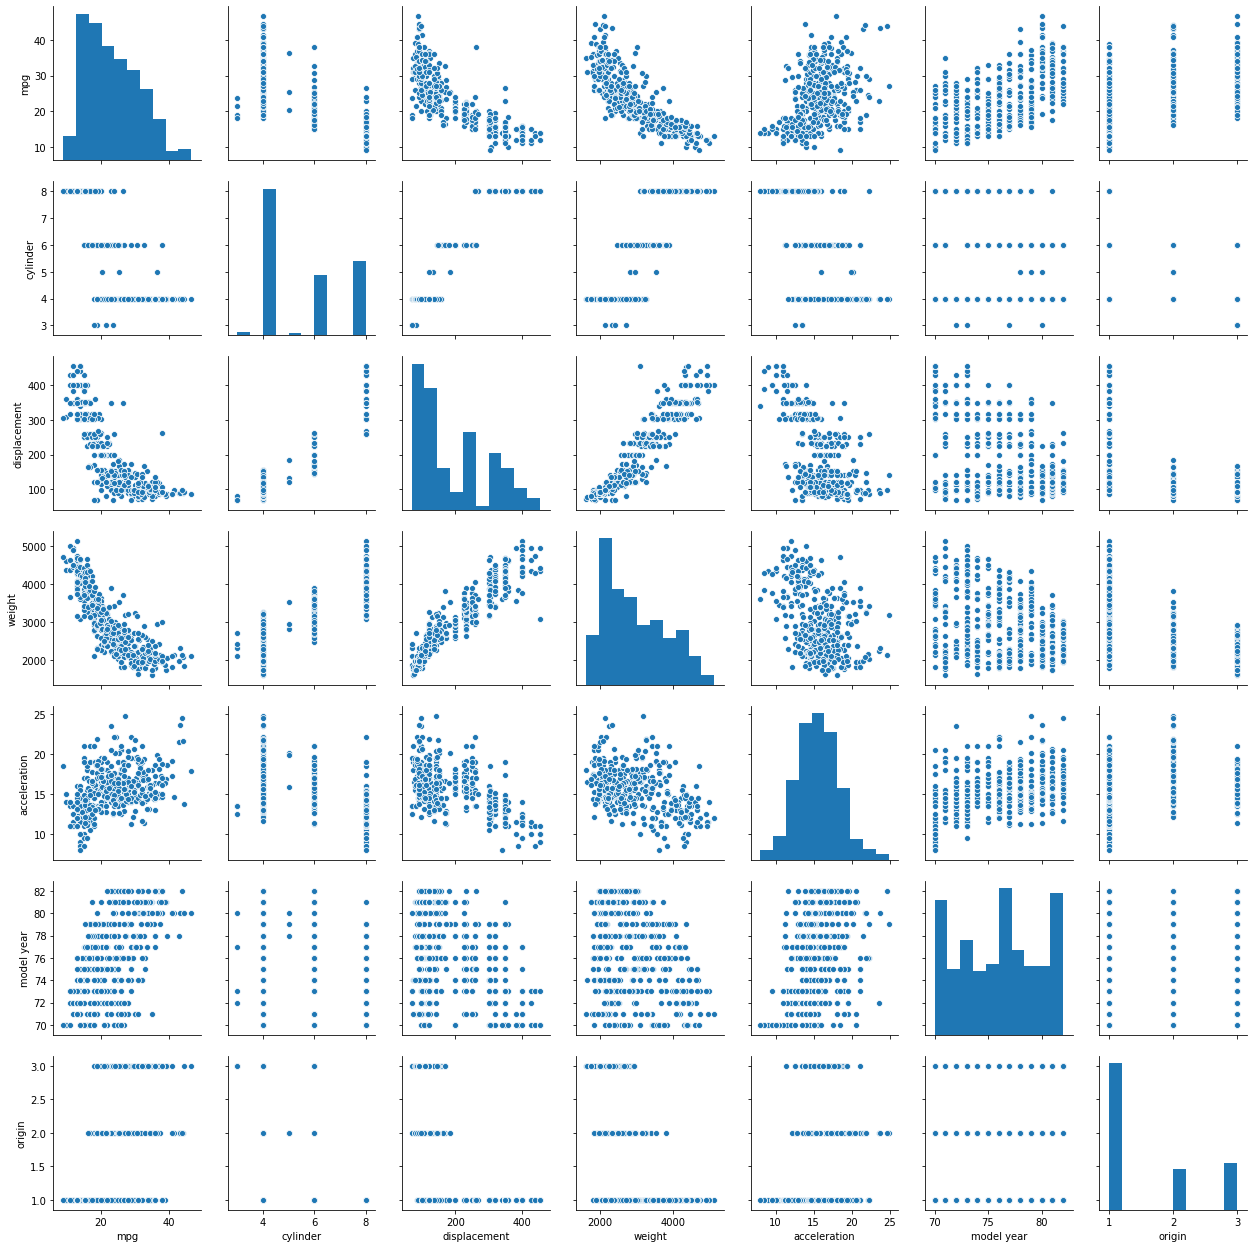

,mpg,cylinder,displacement,weight,acceleration,model year,origin
mpg,1,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.56345
cylinder,-0.775396,1,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1,0.180662
origin,0.56345,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1


In [17]:
# library
import seaborn as sns #seaborn is a plotting tool  install it or install anconda
import matplotlib.pyplot as plt
%matplotlib inline 
    
# Basic correlogram
sns.pairplot(auto)
plt.show()

# below we are looking at the correlation.  since displacment and weight are coreelated, we need to use only 1

corr = auto.corr()
corr.style.background_gradient(cmap='coolwarm')

In [5]:
reg = linear_model.LinearRegression() # Defing the model (linear regression model)
print(reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [11]:
x_train, x_test, y_train, y_test = train_test_split(auto_disp, \
                                                    auto_mpg, \
                                                    test_size=0.2, \
                                                   random_state=4) # Sets the seeds so always pick the same random numbers.  Also, you want to go for 20% for test (0.2)
    
print(y_train.shape)
print(x_train.shape)
print(y_train[0:5])

(318,)
(318,)
153    0.180
42     0.120
203    0.295
128    0.150
102    0.260
Name: mpg, dtype: float64


In [12]:
print(y_train.shape) 
y_train = y_train[:,None]  #none is going to put 1.  train requires 2D input.  Also, look up what vector is
print(y_train.shape)
x_train = x_train[:,None]
print(x_train.shape)
x_test = x_test[:,None]
y_test = y_test[:,None]

(318,)
(318, 1)
(318, 1)


In [13]:
reg.fit(x_train, y_train)  # This creates the linear regressions

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(reg.coef_  # printing the linear model info
print(reg.intercept_)

[[-0.05885609]]
[0.34875617]


#### Metrics for Linear Regression

Mean Squared Error 

For linear regresion with one variable, $ y = mx +b $

$ MSE = \frac{1}{N} \sum_{i=1}^{n} (y_i - (mx_i + b))^2 $ 

$y_i$ is the actual value and $mx_i + b$ is the predicted value.

$N$ is the number of observations.

The loss function based on the MSE is 

$ L(m, b) = \frac{1}{N} \sum_{i=1}^{n} (y_i - (mx_i + b))^2 $ 

our goal is to minimize $L$ with respect to $m$ and $b$

The gradient of $L$

$L'(m, b) = \begin{bmatrix} \frac{dL}{dm} \\ \frac{dL}{db} \end{bmatrix} = \begin{bmatrix} \frac{1}{N} \sum -x_i.2(y_i - (mx_i + b))  \\ \frac{1}{N} \sum -2(y_i - (mx_i + b))  \end{bmatrix}$ 

Update equation of m and b with learning rate $\epsilon$ is

$ m = m - \epsilon \frac{dL}{dm} $  

$ b = b - \epsilon \frac{dL}{db} $

nick's notes: flucuation is zig zagging acros the axis, want to reach the minimum in steady slope

<img src="linear_loss.png", width=400, height=300>


#### Different Gradient Descents

Gradient Descsent - every single data point is considered for update. 

Batch Gradient Descent - A whole batch of data is considered and then an update is done. 
It is slow when the training data is large. 

Stochastic (Random) Gradient Descent - a single point at random is chosen and loss is computed for update. 

Mini-batch Stochastic Gradient Descent - a mini-batch of randomly selected data points is considered and the average loss of the mini-batch is computed for the update. 

In [21]:
yhat = reg.predict(x_test)

In [23]:
print(yhat[0]) # predicted
print(y_test[0]) # actual

[0.29872849]
[0.318]


In [24]:
# mean squared error
np.mean((yhat-y_test)**2)


0.0018953483095580659

In [25]:
print(y_test[0])
print((np.mean(yhat-y_test)**2)/np.mean(y_test)) # take predicted mean and divide my mean of actual (we want small this is sgood)

[0.318]
5.718647912806929e-06


In [ ]:
"""
In-class activity: In the auto-mpg example, find the relationship between 
weight and mpg. Find the mean squared error. 
"""

Multilinear Regression - In a multilinear regression, instead of one independent variable, we will consider more than one independent variable to find a linear relationship between independent variables and dependent variable. In the below example, we will consider two features, displacement and weight as inputs for our model and our target will still be mpg. 

In [ ]:
auto_weight = auto['weight'].astype(float)

In [ ]:
x = np.array([auto_disp, auto_weight]).T
print(x.shape)
y = np.array([auto_mpg]).T
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, \
                                                    y, \
                                                    test_size=0.2, \
                                                    random_state=4)

In [ ]:
reg.fit(x_train, y_train)

In [ ]:
print(reg.coef_)
print(reg.intercept_)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))

In [ ]:
np.mean((yhat-y_test)**2)

In [ ]:
"""
In-class activity: In the auto-mpg example, find the relationship between 
horse power and weight with car mpg. Find the mean squared error. 
"""

In [27]:
import xlrd
